# 1. Introduction to Artificial Neural Networks

### 1.1 Brain and Neurons

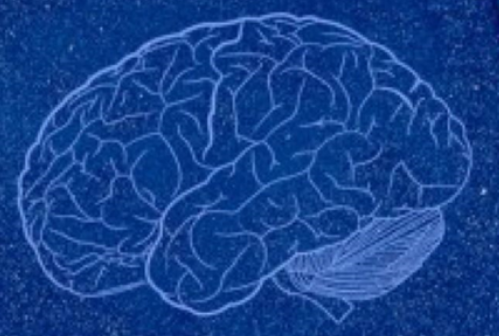
#### The main function of the brain is to process the information that will help in making the appropriate decision

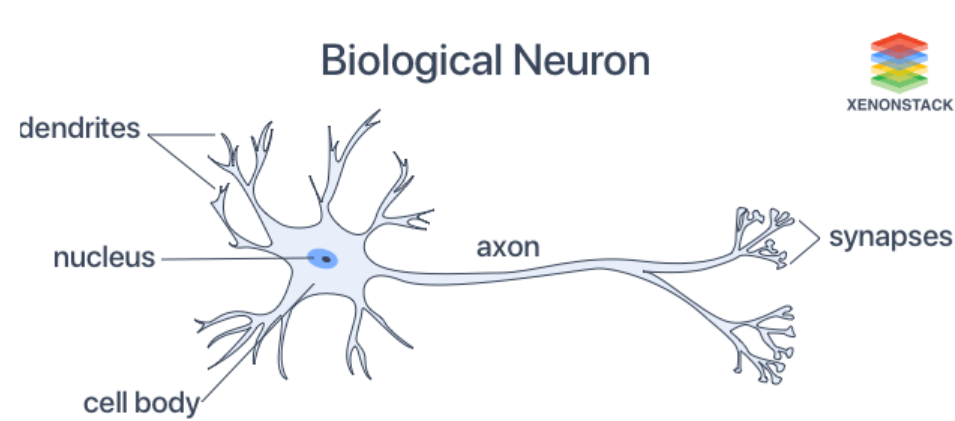
Ref. https://www.xenonstack.com/blog/artificial-neural-network-applications/

## 1.2 Ingredients of a Biologcal Neuron

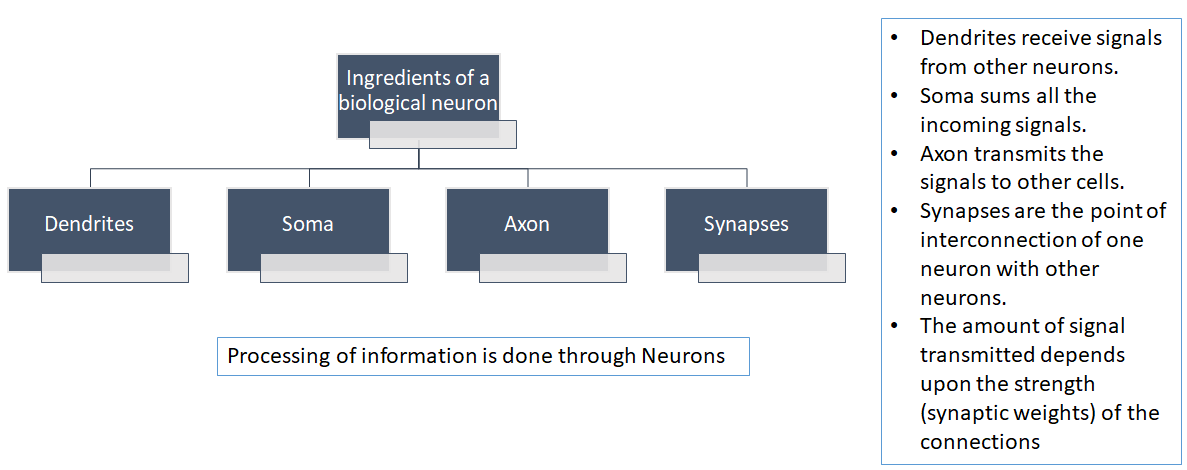

# 2. Artificial Neural Networks

1. Supervised learning algorithm, 
2. Inspired by the functioning of brain, in which the information is processed through a set of interconnected nodes
3. Information is fed to the network in the form of input and output.
4. Inter neuron connection strengths (weights) are used to store the acquired information (the training examples).
5. During the learning process the weights are modified/adjusted to model the learning task correctly

## 2.1 Most Basic Structures
#### 1. McCulloch Pitts Neuron
#### 2. Peceptron

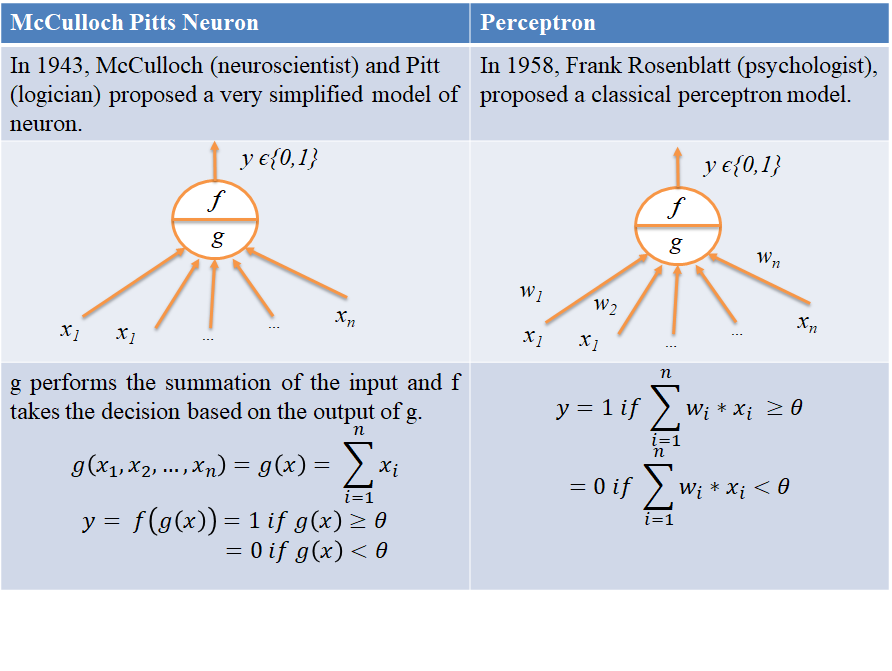
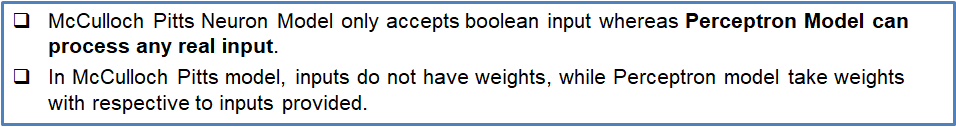

## 2.2 definition of a Perceptron

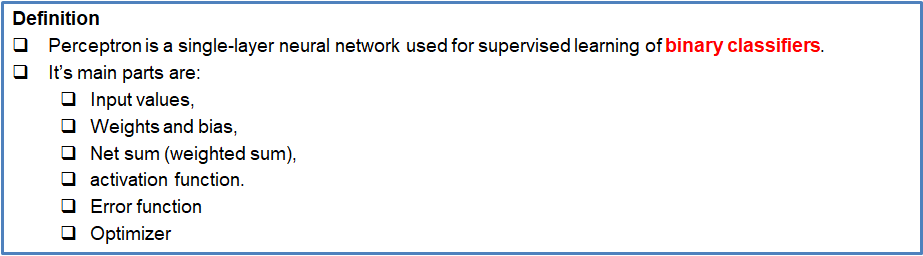

## 2.3 Algorithmic steps of an ANN

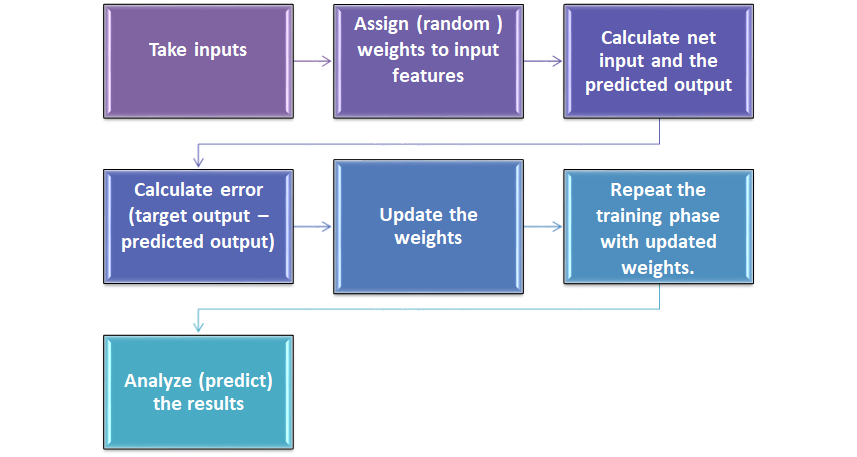

## 2.4 SingleLayer Perceptron (or Perceptron) and Multi Layer Perceptron (MLP)

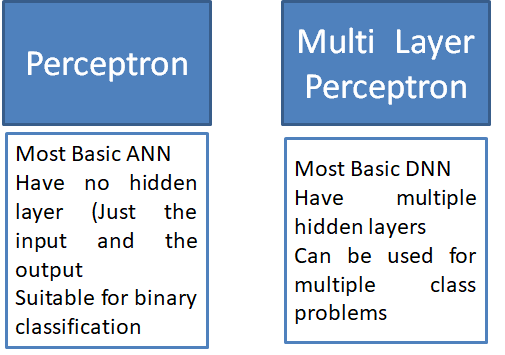

## 2.5 Representation of ANN

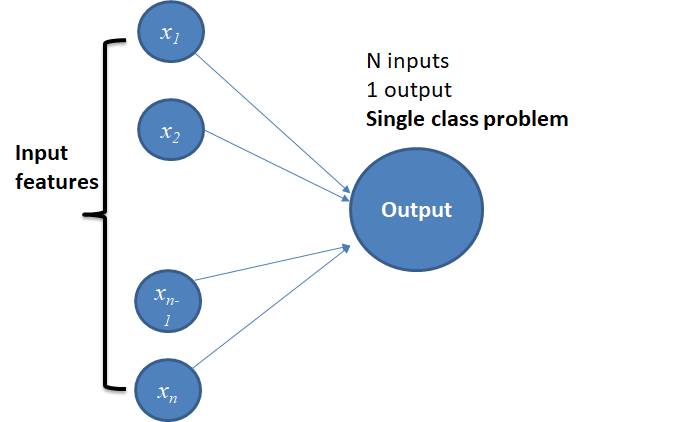

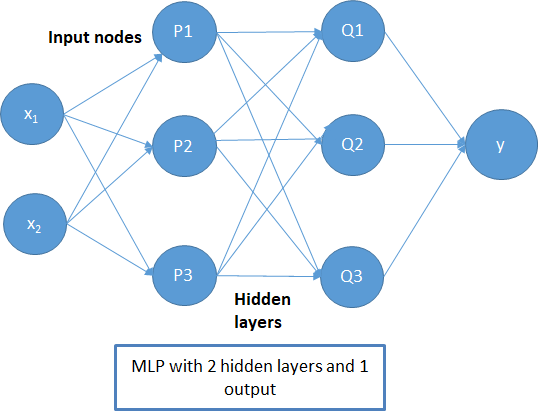

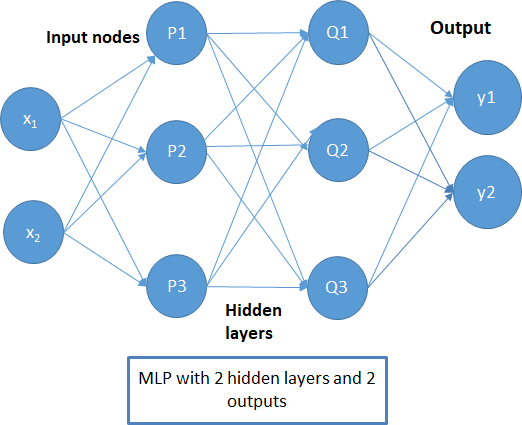

# 3. Ingredients for a neural network
    
    Input Layer: Made up of the features. No Computation is done.
    Weights and Biases: Weights and biases (user defined) are the learnable parameter of the model.
    Adder Function: for calculating the net input (weighted sum)
    Activation Function: also know as Transfer Function defines the output of the node corresponding to the given input or the set of input.
    Hidden Layer: intermediate layer where weights are applied to inputs and transmitted to the next layer(hidden/output). (In a perceptron model, we do not have a hidden layer.)
    Output Layer: Here eventually we use an activation function to get the (desired) output. **This is called the target layer**
    Error Function
    Optiizer

## Hyperparameters in a Simple Neural Network
    Larning Rate
    Number of Epochs

# 4. Working of a NN

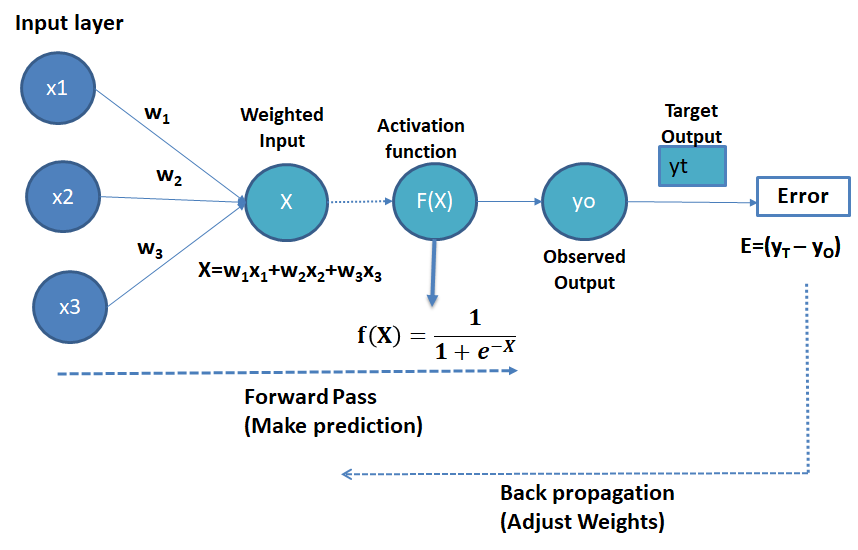

# 5. Looking at different parts of an ANN one by one

### Weights and Biases: 
    randomly assigned by the user in the beginning. These are the learnable parameters of the model.

## 5.1 Adder Function

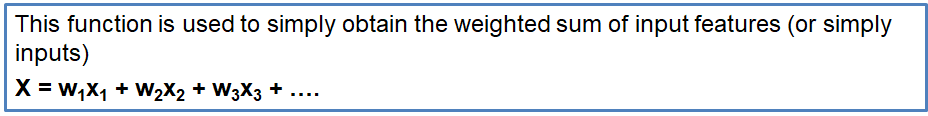

## 5.2 Activation Functions

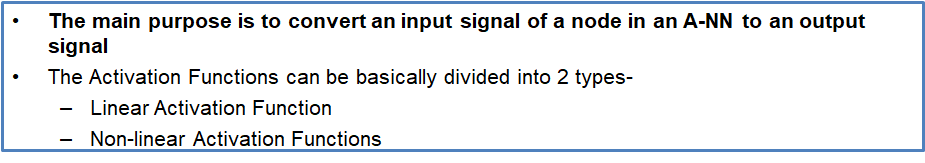

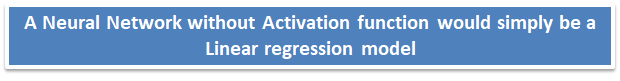

# 6. Step by step working of ANN

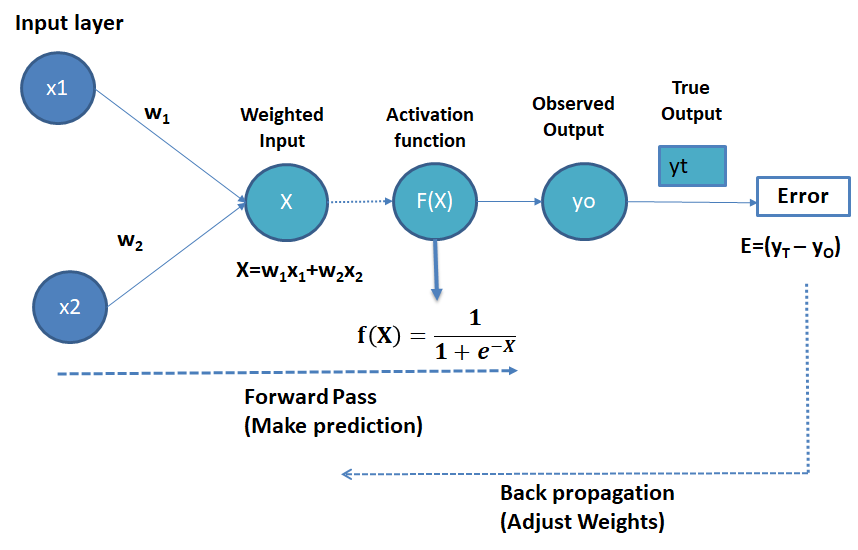

## 6.1. Taking a small example

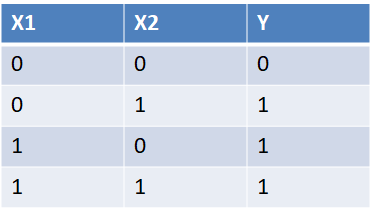

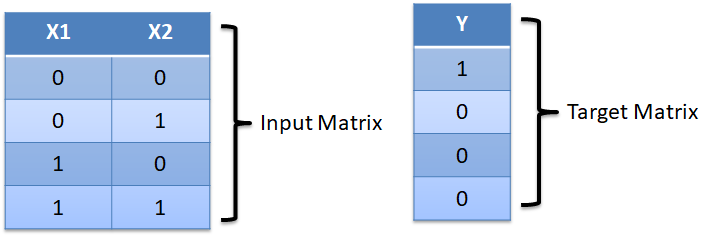

## 6.2.A. import required libraries

In [1]:
### Import required libraries
import numpy as np
import matplotlib.pyplot as plt

## 6.3.B. Define Input Parameters

In [2]:
# Define input features
input_features = np.array([[0,0], [0,1],[1,0],[1,1]])
print(input_features.shape)
input_features

(4, 2)


array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

## 6.4.C. Define Output Parameters

In [3]:
# Define target ouput
target_output=np.array([[1,0,0,0]])
#Reshaping the target output into vector:
target_output = target_output.reshape(4,1)
print(target_output.shape)
target_output
###Instead of reshaping the target output, we can write as target_output=np.array([[[0],[1],[1],[1]]]) ###

(4, 1)


array([[1],
       [0],
       [0],
       [0]])

### 6.5.D. Define initial weight matrix and the learning rate

In [4]:
weights = np.array([[0.1],[0.2]])
print(weights.shape)
print(weights)

### Define learning rate
lr = 0.05

(2, 1)
[[0.1]
 [0.2]]


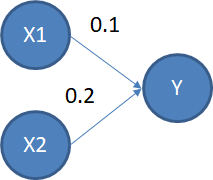

## 6.6 Forward Pass (Calculate up to the error)

### 6.6.1 Weighted Sum

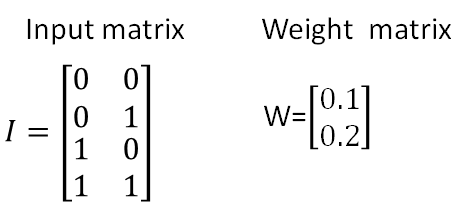

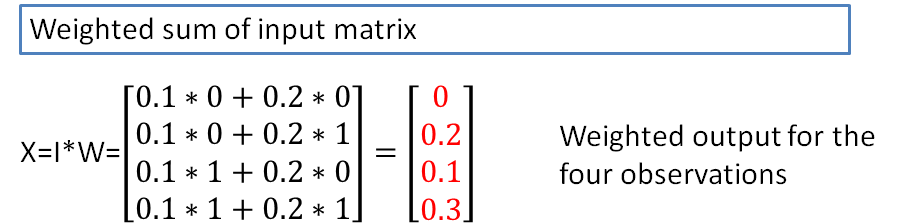

In [5]:
#WS=input_features@weights
WS = np.dot(input_features,weights)
print(WS)

[[0. ]
 [0.2]
 [0.1]
 [0.3]]


## 6.7 Define Activation Function:
### We will use Sigmoid function in this example

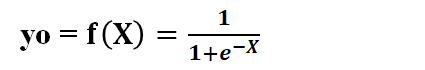

In [6]:
## Sigmoid Function
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [7]:
print(sigmoid(WS)) ### pedicted output

[[0.5       ]
 [0.549834  ]
 [0.52497919]
 [0.57444252]]


### 6.8. Derivative of the Sigmoid Function (we will be needing it during the back propagation phase):

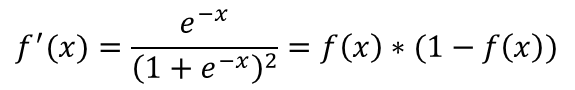

In [8]:
## Derivative of sigoid function:
def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

## First the Forward Pass
1. Weighted Sum
2. Activation Function
3. Predicted output

## Weighted Sum

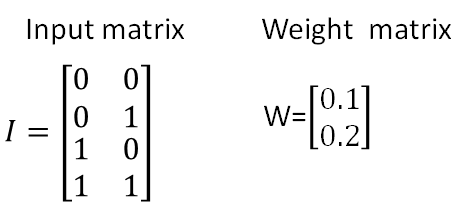

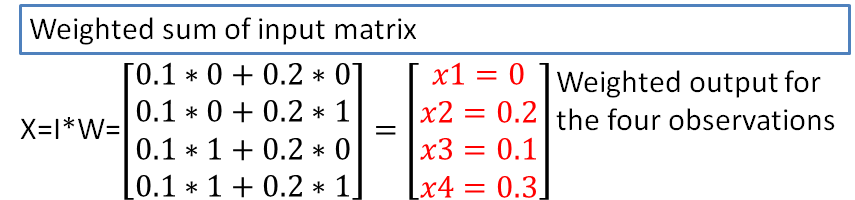

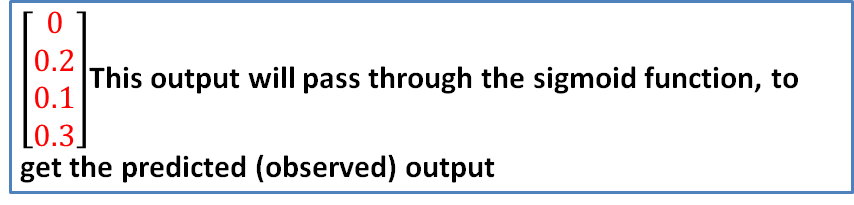

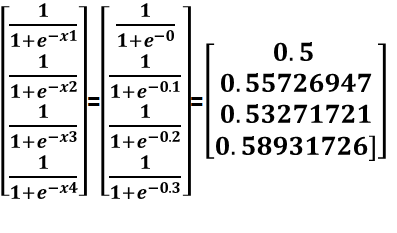

## Calculate the error

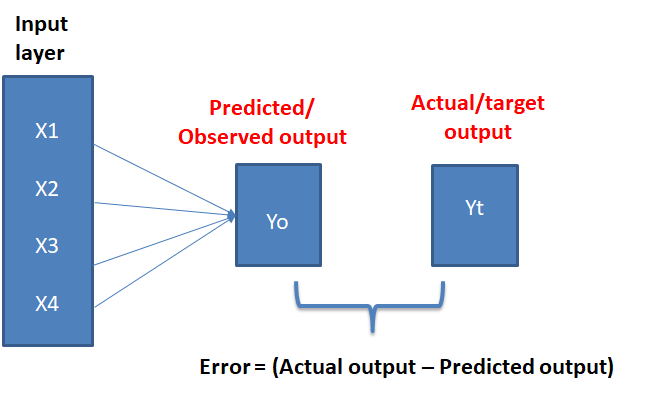

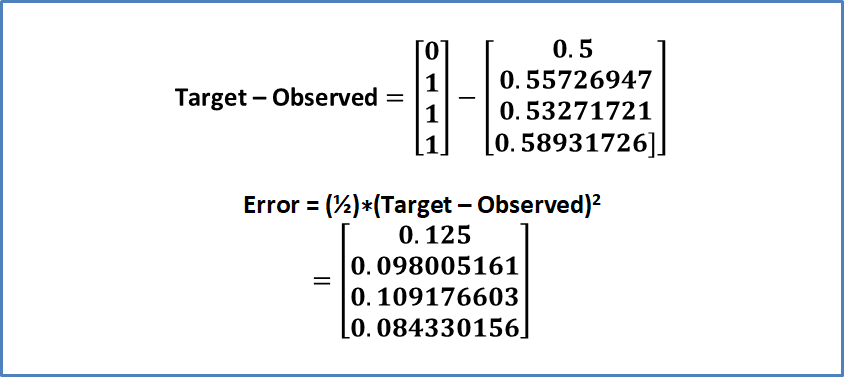

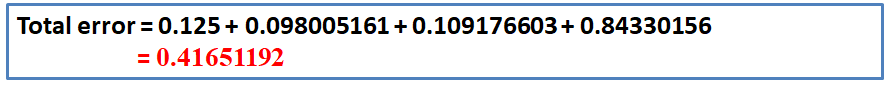

## ****** Now the backpropagation *****

#### In backpropagation, we determine how much a change in weights affects the total error, E.
#### i.e. we determine 𝝏𝑬/𝝏𝒘

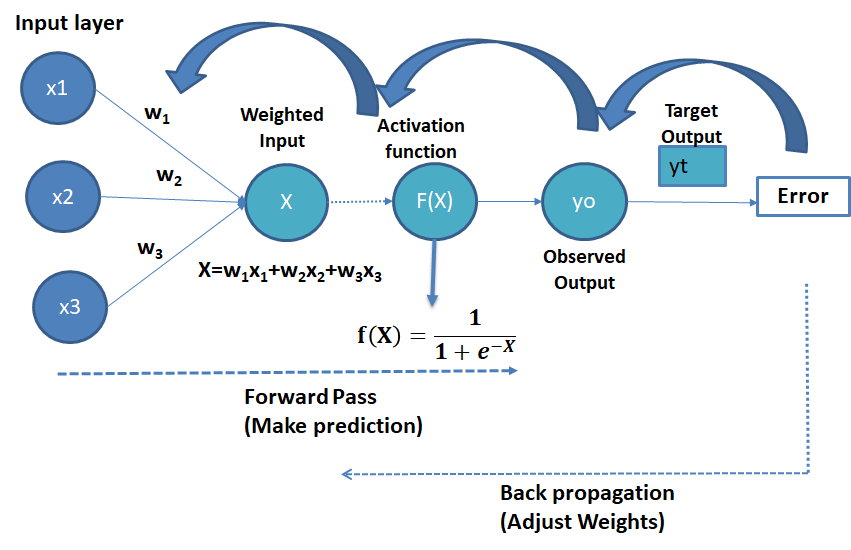

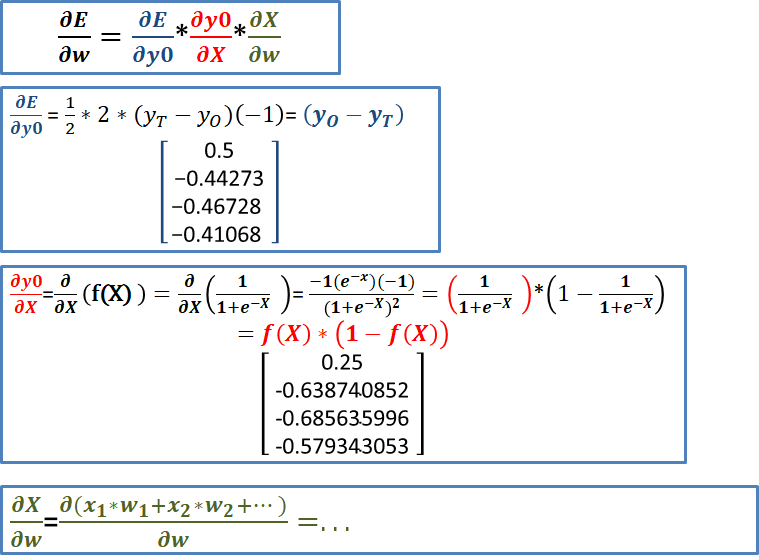

### To decrease the error, we then subtract this value from the current weight multiplied by some learning rate (lr) to obtain the new weight.
### new weight = old weight - (lr)𝝏𝑬/𝝏𝒘
### lr is the learning rate (denoted as alpha most of the times)

## Now performing the iterations 
### The number of epochs are taken as 10000
### The example is done without using bias

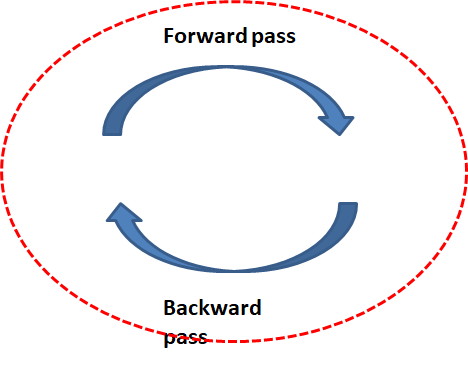

In [9]:
### Running the code 10000 times:
for epoch in range(1000):
    print("epoch=", epoch)
    inputs = input_features
    
    ##print("inputs=","\n", inputs )
    ##print("weights=","\n", weights)
    
    # Feedforward input:
    pred_in = np.dot(inputs, weights) ## perforim the matrix multipication (row*column) and obtain the weighted matrix
    ##print("pred_in=", "\n", pred_in)
        
    #feedforward output:
    pred_out = sigmoid(pred_in)
    ##print("output=","\n", pred_out)
   
    #Calculating Error
    error = (1/2)*pow(target_output-pred_out,2)
    #Error = (1/2)*(error*error)
    ##print("error=", "\n", error)
    x=error.sum() ### total error
    print("total error=","\n", x)
########################### Forward Pass Complete #####################

###############################################################

##################### Back propagation #################   
   
    #Calculate derivative:
    dcost_dpred = (pred_out-target_output)
    ##print("derivative1=", "\n", dcost_dpred)
   
    dpred_dz=sigmoid_der(pred_out)
    ##print("derivative2=","\n", dpred_dz)
    #Multiplying individual derivatives:
    
    z_delta=dcost_dpred*dpred_dz #### operator * is for element by element multiplication ###
    ##print("derivative1*derivative2=", "\n", z_delta)
    
    #Multiplying with the 3rd individual derivative:
    inputs=input_features.T
    ##print("3rd derivative", "\n", inputs)
    ##print(np.dot(inputs, z_delta))
    
    #### Uodate the weights ####
    weights-=lr*np.dot(inputs, z_delta)
    print("new weights=","\n", weights)
    

epoch= 0
total error= 
 0.5789523885037896
new weights= 
 [[0.08725063]
 [0.18700215]]
epoch= 1
total error= 
 0.5719204958266513
new weights= 
 [[0.07459461]
 [0.17409735]]
epoch= 2
total error= 
 0.5649837692633423
new weights= 
 [[0.06203193]
 [0.16128563]]
epoch= 3
total error= 
 0.5581430443203779
new weights= 
 [[0.04956253]
 [0.14856697]]
epoch= 4
total error= 
 0.5513990279160673
new weights= 
 [[0.03718635]
 [0.13594132]]
epoch= 5
total error= 
 0.5447523011138599
new weights= 
 [[0.02490325]
 [0.1234086 ]]
epoch= 6
total error= 
 0.5382033221777045
new weights= 
 [[0.0127131]
 [0.1109687]]
epoch= 7
total error= 
 0.5317524299191572
new weights= 
 [[0.00061571]
 [0.09862145]]
epoch= 8
total error= 
 0.5253998473056326
new weights= 
 [[-0.01138913]
 [ 0.08636668]]
epoch= 9
total error= 
 0.519145685299116
new weights= 
 [[-0.02330167]
 [ 0.07420418]]
epoch= 10
total error= 
 0.5129899468948654
new weights= 
 [[-0.03512217]
 [ 0.06213368]]
epoch= 11
total error= 
 0.506932531330

 [[-1.0460854 ]
 [-0.97751352]]
epoch= 148
total error= 
 0.2029789272849345
new weights= 
 [[-1.0507352 ]
 [-0.98232215]]
epoch= 149
total error= 
 0.2023736329725811
new weights= 
 [[-1.05536236]
 [-0.98710749]]
epoch= 150
total error= 
 0.2017757892745633
new weights= 
 [[-1.0599671 ]
 [-0.99186974]]
epoch= 151
total error= 
 0.2011852702892779
new weights= 
 [[-1.06454962]
 [-0.99660912]]
epoch= 152
total error= 
 0.20060195277279774
new weights= 
 [[-1.06911013]
 [-1.00132585]]
epoch= 153
total error= 
 0.20002571607352662
new weights= 
 [[-1.07364885]
 [-1.00602014]]
epoch= 154
total error= 
 0.1994564420686179
new weights= 
 [[-1.07816596]
 [-1.01069218]]
epoch= 155
total error= 
 0.1988940151021087
new weights= 
 [[-1.08266169]
 [-1.01534219]]
epoch= 156
total error= 
 0.19833832192472037
new weights= 
 [[-1.08713621]
 [-1.01997037]]
epoch= 157
total error= 
 0.1977892516352805
new weights= 
 [[-1.09158974]
 [-1.0245769 ]]
epoch= 158
total error= 
 0.19724669562371985
new weigh

new weights= 
 [[-1.43142661]
 [-1.37616418]]
epoch= 250
total error= 
 0.165546823991888
new weights= 
 [[-1.43452614]
 [-1.37936992]]
epoch= 251
total error= 
 0.16533099576970556
new weights= 
 [[-1.43761561]
 [-1.38256521]]
epoch= 252
total error= 
 0.16511695707806423
new weights= 
 [[-1.44069508]
 [-1.38575011]]
epoch= 253
total error= 
 0.16490468746364556
new weights= 
 [[-1.44376461]
 [-1.38892468]]
epoch= 254
total error= 
 0.16469416677284074
new weights= 
 [[-1.44682427]
 [-1.392089  ]]
epoch= 255
total error= 
 0.16448537514639863
new weights= 
 [[-1.44987412]
 [-1.39524312]]
epoch= 256
total error= 
 0.16427829301418617
new weights= 
 [[-1.45291423]
 [-1.39838713]]
epoch= 257
total error= 
 0.16407290109005787
new weights= 
 [[-1.45594466]
 [-1.40152107]]
epoch= 258
total error= 
 0.1638691803668322
new weights= 
 [[-1.45896547]
 [-1.40464502]]
epoch= 259
total error= 
 0.16366711211137244
new weights= 
 [[-1.46197673]
 [-1.40775904]]
epoch= 260
total error= 
 0.163466677

 0.15135977263366357
new weights= 
 [[-1.68128125]
 [-1.63437558]]
epoch= 342
total error= 
 0.15124901120128192
new weights= 
 [[-1.68366864]
 [-1.63684029]]
epoch= 343
total error= 
 0.1511389652400598
new weights= 
 [[-1.68605011]
 [-1.63929883]]
epoch= 344
total error= 
 0.15102962843802706
new weights= 
 [[-1.68842569]
 [-1.64175124]]
epoch= 345
total error= 
 0.15092099455435623
new weights= 
 [[-1.69079542]
 [-1.64419754]]
epoch= 346
total error= 
 0.1508130574183828
new weights= 
 [[-1.69315932]
 [-1.64663777]]
epoch= 347
total error= 
 0.150705810928641
new weights= 
 [[-1.69551742]
 [-1.64907196]]
epoch= 348
total error= 
 0.15059924905191577
new weights= 
 [[-1.69786974]
 [-1.65150013]]
epoch= 349
total error= 
 0.15049336582230963
new weights= 
 [[-1.70021633]
 [-1.65392232]]
epoch= 350
total error= 
 0.1503881553403251
new weights= 
 [[-1.70255721]
 [-1.65633856]]
epoch= 351
total error= 
 0.15028361177196145
new weights= 
 [[-1.7048924 ]
 [-1.65874888]]
epoch= 352
total e

 [-1.92501296]]
epoch= 479
total error= 
 0.14088340906441493
new weights= 
 [[-1.96502213]
 [-1.92684868]]
epoch= 480
total error= 
 0.1408323833577331
new weights= 
 [[-1.96680286]
 [-1.92868099]]
epoch= 481
total error= 
 0.14078160697208292
new weights= 
 [[-1.96858034]
 [-1.93050991]]
epoch= 482
total error= 
 0.1407310782598379
new weights= 
 [[-1.97035457]
 [-1.93233545]]
epoch= 483
total error= 
 0.1406807955871758
new weights= 
 [[-1.97212557]
 [-1.93415762]]
epoch= 484
total error= 
 0.14063075733393746
new weights= 
 [[-1.97389336]
 [-1.93597644]]
epoch= 485
total error= 
 0.14058096189348834
new weights= 
 [[-1.97565793]
 [-1.93779191]]
epoch= 486
total error= 
 0.14053140767258085
new weights= 
 [[-1.97741932]
 [-1.93960406]]
epoch= 487
total error= 
 0.14048209309121898
new weights= 
 [[-1.97917752]
 [-1.94141289]]
epoch= 488
total error= 
 0.14043301658252397
new weights= 
 [[-1.98093254]
 [-1.94321841]]
epoch= 489
total error= 
 0.1403841765926022
new weights= 
 [[-1.98

epoch= 675
total error= 
 0.13420130747938558
new weights= 
 [[-2.26364681]
 [-2.2334897 ]]
epoch= 676
total error= 
 0.13417901221006487
new weights= 
 [[-2.26495917]
 [-2.23483438]]
epoch= 677
total error= 
 0.13415679856854698
new weights= 
 [[-2.26626976]
 [-2.23617724]]
epoch= 678
total error= 
 0.1341346661533195
new weights= 
 [[-2.26757862]
 [-2.23751829]]
epoch= 679
total error= 
 0.13411261456535783
new weights= 
 [[-2.26888573]
 [-2.23885753]]
epoch= 680
total error= 
 0.13409064340810692
new weights= 
 [[-2.27019111]
 [-2.24019496]]
epoch= 681
total error= 
 0.13406875228746232
new weights= 
 [[-2.27149475]
 [-2.2415306 ]]
epoch= 682
total error= 
 0.13404694081175245
new weights= 
 [[-2.27279667]
 [-2.24286444]]
epoch= 683
total error= 
 0.13402520859171982
new weights= 
 [[-2.27409686]
 [-2.24419648]]
epoch= 684
total error= 
 0.13400355524050345
new weights= 
 [[-2.27539533]
 [-2.24552675]]
epoch= 685
total error= 
 0.1339819803736209
new weights= 
 [[-2.2766921 ]
 [-2.2

total error= 
 0.13137859733919285
new weights= 
 [[-2.46055905]
 [-2.43496577]]
epoch= 842
total error= 
 0.1313657748139469
new weights= 
 [[-2.46163371]
 [-2.43606375]]
epoch= 843
total error= 
 0.13135299113567137
new weights= 
 [[-2.4627072 ]
 [-2.43716053]]
epoch= 844
total error= 
 0.1313402461466768
new weights= 
 [[-2.46377952]
 [-2.43825609]]
epoch= 845
total error= 
 0.131327539690078
new weights= 
 [[-2.46485068]
 [-2.43935045]]
epoch= 846
total error= 
 0.13131487160978883
new weights= 
 [[-2.46592068]
 [-2.44044361]]
epoch= 847
total error= 
 0.13130224175051766
new weights= 
 [[-2.46698952]
 [-2.44153557]]
epoch= 848
total error= 
 0.1312896499577621
new weights= 
 [[-2.4680572 ]
 [-2.44262633]]
epoch= 849
total error= 
 0.1312770960778045
new weights= 
 [[-2.46912373]
 [-2.44371589]]
epoch= 850
total error= 
 0.13126457995770693
new weights= 
 [[-2.47018911]
 [-2.44480426]]
epoch= 851
total error= 
 0.13125210144530647
new weights= 
 [[-2.47125334]
 [-2.44589145]]
epoch

### Make predictions:
#### for (1,0), the target output = 0
#### We will check if for the optimized weights we are gettig the correct answer (4.617, 4.620)

In [10]:
#taking inputs:
single_point = np.array([1,0])
#1st step:
result1 = np.dot(single_point, weights)
print("result1=", result1)
#2nd step:
result2 = sigmoid(result1)
#Print final result
print("output=", result2)

result1= [-2.61732807]
output= [0.06803151]


From the predicted output we can see that it’s close to 1.

### Prediction for (0,0)

In [11]:
#taking inputs
single_point = np.array([0,0])
#1st step:
#1st step:
result1 = np.dot(single_point, weights)
#2nd step:
result2 = sigmoid(result1)
#Print final result
print(result2)
##0.5

[0.5]


Here we can see that it’s nowhere near 0. So we can say that our model failed to predict it. This is the reason for adding the bias value.

### Prediction for (1,1); Target output = 0

In [12]:
#taking inputs
single_point = np.array([1,1])
#1st step:
#1st step:
result1 = np.dot(single_point, weights)
#2nd step:
result2 = sigmoid(result1)
#Print final result
print(result2)
##

[0.00541966]


 ## 7 Activation functions and their Python Codes
        ‘identity’, returns f(x) = x
        ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
        ‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
        ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)
        'leaky relu', modified variant of relu function

## 7.1 Importing library required for the implementation of above activation function ( numpy and matplotlib )

In [13]:
import numpy as np
import matplotlib.pyplot as plt

#  7.2 Sigmoid Activation Function (also know as logistic function)
#### The sigmoid activation function is used mostly as it does its task with great efficiency, it basically is a probabilistic approach towards decision making and ranges in between 0 to 1, so when we have to make a decision or to predict an output we use this activation function because of the range is the minimum, therefore, prediction would be more accurate.

####  The equation for the sigmoid function is
####                                                                               f(x) = 1/(1+exp(-x) )



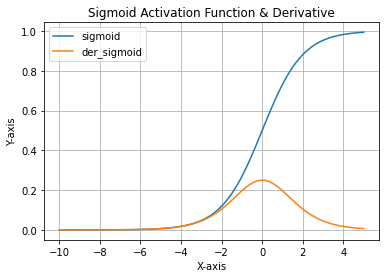

In [14]:
# Sigmoid Activation Function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Derivative of Sigmoid
def der_sigmoid(x):
    return sigmoid(x) * (1- sigmoid(x))

# Generating data to plot
x_data = np.linspace(-10,5,100)
##print(x_data)
y_sig = sigmoid(x_data)
dy_sig = der_sigmoid(x_data)

# Plotting
plt.plot(x_data, y_sig, x_data, dy_sig)
plt.title('Sigmoid Activation Function & Derivative')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('tight')
plt.legend(['sigmoid','der_sigmoid'])
plt.grid()
plt.show()

#  7.3 Hyperbolic Tangent Activation Function(Tanh)

#### This activation function is slightly better than the sigmoid function, like the sigmoid function it is also used to predict or to differentiate between two classes but it maps the negative input into negative quantity only and ranges in between -1 to  1.

####  Similar to the sigmoid function, one of the interesting properties of the tanh function is that the derivative of tanh can be expressed in terms of the function itself.

### f(x) = tanh(x) = 2/(1 + e-2x) - 1
### OR
### tanh(x) = 2 * sigmoid(2x) - 1 



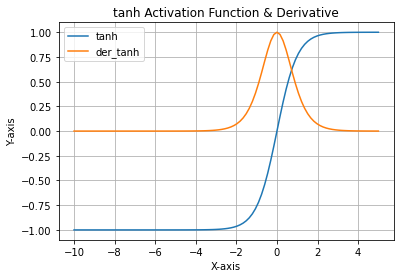

In [15]:
# Tan Hyperbolic (tanh) Activation Function
def tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

# tanh derivative
def der_tanh(x):
    return 1 - tanh(x) * tanh(x)

# Generating data for Graph
x_data = np.linspace(-10,5,100)
y_tanh = tanh(x_data)
dy_tanh = der_tanh(x_data)

# Graph
plt.plot(x_data, y_tanh, x_data, dy_tanh)
plt.title('tanh Activation Function & Derivative')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('tight')
plt.legend(['tanh','der_tanh'])
plt.grid()
plt.show()

### Drawback with Sigmoid and Tanh functions
    A general problem with both the sigmoid and tanh functions is that they saturate. 
    
    This means that large values snap to 1.0 and small values snap to -1 or 0 for tanh and sigmoid respectively. 
    Further, the functions are only really sensitive to changes around their mid-point of their input, such as 0.5 for sigmoid and 0.0 for tanh.
    Also, as the capability of hardware increased through GPUs’ very deep neural networks using sigmoid and tanh activation functions could not easily be trained.

    Layers deep in large networks using these nonlinear activation functions fail to receive useful gradient information. 
    Error is back propagated through the network and used to update the weights. 
    The amount of error decreases dramatically with each additional layer through which it is propagated, given the derivative of the chosen activation function.

## 7.4 Rectified Linear Unit (ReLU) 

##### rectified linear  function
    The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.
    The function is linear for values greater than zero, meaning it has a lot of the desirable properties of a linear activation function when training a neural network using backpropagation. Yet, it is a nonlinear function as negative values are always output as zero.
    The rectified linear activation function is a simple calculation that returns the value provided as input directly, or the value 0.0 if the input is 0.0 or less.
    It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.

##### Variants
    Leaky ReLU 
    Leaky ReLU has a small slope for negative values, instead of altogether zero. For example, leaky ReLU may have y = 0.01x when x < 0.

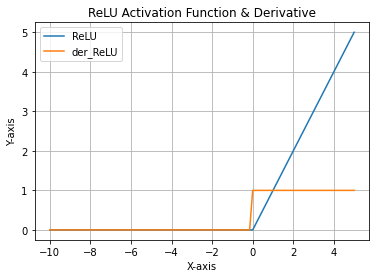

In [16]:
# Rectified Linear Unit (ReLU)
def ReLU(x):
    return 0 if x < 0 else x

# Derivative for ReLU
def der_ReLU(x):
    return 0 if x < 0 else 1

# Generating data for Graph
x_data = np.linspace(-10,5,100)
y_ReLU = list(map(ReLU,x_data))
dy_ReLU = list(map(der_ReLU,x_data))

# Graph
plt.plot(x_data, y_ReLU, x_data, dy_ReLU)
plt.title('ReLU Activation Function & Derivative')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('tight')
plt.legend(['ReLU','der_ReLU'])
plt.grid()
plt.show()

## 7.5 Leaky Rectified Linear Unit (leaky ReLU)
#### Leaky Relu is a variant of ReLU. Instead of being 0 when z<0, a leaky ReLU allows a small, non-zero, constant gradient α (normally, α=0.01). However, the consistency of the benefit across tasks is presently unclear. Leaky ReLUs attempt to fix the “dying ReLU” problem.

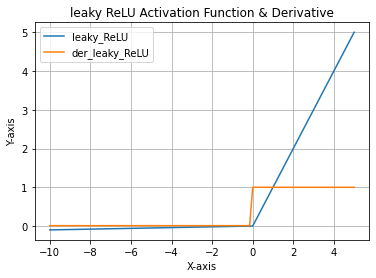

In [17]:
# Leaky Rectified Linear Unit (leaky ReLU) Activation Function
def leaky_ReLU(x,a=0.01):
    return x*a if x < 0 else x

# Derivative for leaky ReLU 
def der_leaky_ReLU(x,a=0.01):
    return 0.01 if x < 0 else 1

# Generating data For Graph
x_data = np.linspace(-10,5,100)
y_leaky_ReLU = list(map(leaky_ReLU,x_data))
dy_leaky_ReLU = list(map(der_leaky_ReLU,x_data))

# Graph
plt.plot(x_data, y_leaky_ReLU, x_data, dy_leaky_ReLU)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('tight')
plt.title('leaky ReLU Activation Function & Derivative')
plt.legend(['leaky_ReLU','der_leaky_ReLU'])
plt.grid()
plt.show()

## Setting data values and creating a data array for various Activation Function

In [18]:
np.random.seed(50)
Arr = np.random.uniform(-10,10,20)
print(Arr)

[-0.10796709 -5.43833791 -4.89052152 -2.07340181 -2.45369805  9.9314846
 -1.83605599  5.4378799   5.21073376 -3.79981303 -3.06917591 -2.96470365
 -7.09066287  9.45329369  8.18356876  1.19914207 -3.72818507  7.76400075
  3.49146132 -2.17825105]


### For Sigmoid function and its derivative

Evaluation over function Sigmoid of the array is : 

[0.47303441717709377, 0.004327889828576673, 0.00746140973460058, 0.11170903082831335, 0.07916853846213084, 0.9999513828020065, 0.1375184113474934, 0.9956701360671022, 0.9945719568562718, 0.021885272995074017, 0.04439677711610712, 0.04904615894746017, 0.0008321520607081901, 0.999921575338654, 0.9997208741840674, 0.7683721281533484, 0.02347223224363994, 0.9995754264965242, 0.9704438389947779, 0.10172062462120247] 

Evaluation over derivative of function Sigmoid of the array is : 

[0.24927285734302101, 0.004309159198208376, 0.007405737099372987, 0.0992301232597123, 0.07290088097990095, 4.8614834361598284e-05, 0.118607097887955, 0.004311116211220395, 0.00539857949135807, 0.0214063078210051, 0.04242570329780983, 0.04664063323996064, 0.0008314595836560492, 7.841851091849212e-05, 0.00027904790471147044, 0.17797640083044272, 0.022921286557140572, 0.0004243932408159465, 0.02868259435185546, 0.0913735391478749]


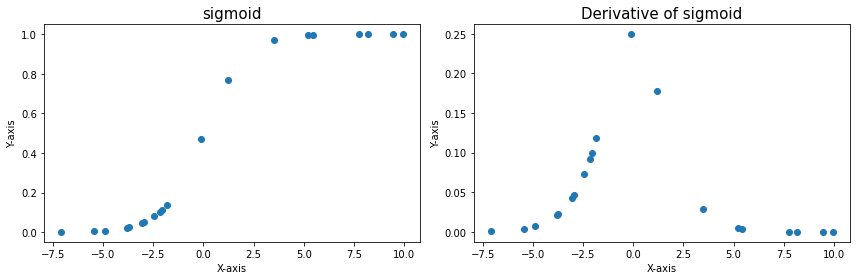

In [19]:
sigmoid_values = list(map(sigmoid , Arr))
print("Evaluation over function Sigmoid of the array is : \n")
print((sigmoid_values),"\n")

sigmoid_d_values = list(map(der_sigmoid , Arr))
print("Evaluation over derivative of function Sigmoid of the array is : \n")
print((sigmoid_d_values))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(Arr, sigmoid_values)
plt.xlabel('X-axis', size=10)
plt.ylabel('Y-axis', size=10)
plt.title('sigmoid',size = 15)

plt.subplot(1,2,2)
plt.scatter(Arr, sigmoid_d_values)
plt.xlabel('X-axis', size=10)
plt.ylabel('Y-axis', size=10)
plt.title('Derivative of sigmoid',size = 15)

plt.tight_layout()

### For tanh and its derivative

Evaluation over function Tanh of the array is : 

[-0.10754951592854844, -0.9999622130795517, -0.9998869807478068, -0.9688626608613904, -0.9853250517195871, 0.9999999952722766, -0.9504151405156913, 0.9999621784504544, 0.9999404295031342, -0.9989992238052947, -0.9956923414787432, -0.9946939979983412, -0.9999986127389928, 0.9999999876972154, 0.9999998440905453, 0.833392735331924, -0.9988451681641307, 0.9999996391684113, 0.998146542769484, -0.974678376305464] 

Evaluation over derivative of function Tanh of the array is : 

[0.9884331016235349, 7.557241304523288e-05, 0.00022602573103502888, 0.061305144388586474, 0.0291345424537931, 9.455446869921502e-09, 0.09671106067853874, 7.564166862150667e-05, 0.00011913744508751378, 0.002000550836418702, 0.008596761120577834, 0.010583850346075896, 2.7745200898987576e-06, 2.4605569026725505e-08, 3.118188850459447e-07, 0.3054565486959736, 0.0023083300351693925, 7.216630472095531e-07, 0.0037034791573266057, 0.050002062762544375]


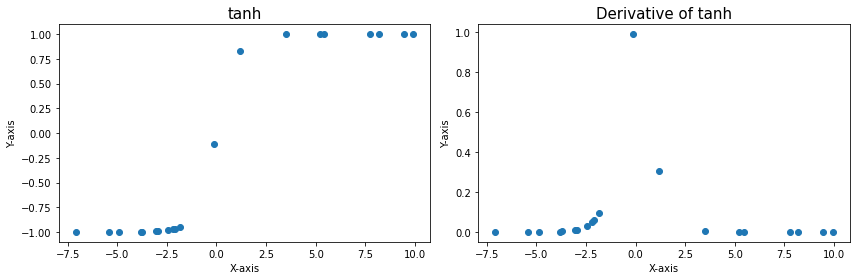

In [20]:
tanh_values = list(map(tanh , Arr))
print("Evaluation over function Tanh of the array is : \n")
print((tanh_values),"\n")

tanh_d_values = list(map(der_tanh , Arr))
print("Evaluation over derivative of function Tanh of the array is : \n")
print((tanh_d_values))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(Arr, tanh_values)
plt.xlabel('X-axis', size=10)
plt.ylabel('Y-axis', size=10)
plt.title('tanh',size = 15)

plt.subplot(1,2,2)
plt.scatter(Arr, tanh_d_values)
plt.xlabel('X-axis', size=10)
plt.ylabel('Y-axis', size=10)
plt.title('Derivative of tanh',size = 15)

plt.tight_layout()

### For ReLU function and its derivative

Evaluation over function ReLU of the array is : 

[0, 0, 0, 0, 0, 9.931484603092986, 0, 5.437879896794271, 5.2107337601776855, 0, 0, 0, 0, 9.453293694349007, 8.183568759849802, 1.1991420744425003, 0, 7.764000750477763, 3.491461316445278, 0] 

Evaluation over derivative of function ReLU of the array is : 

[0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0]


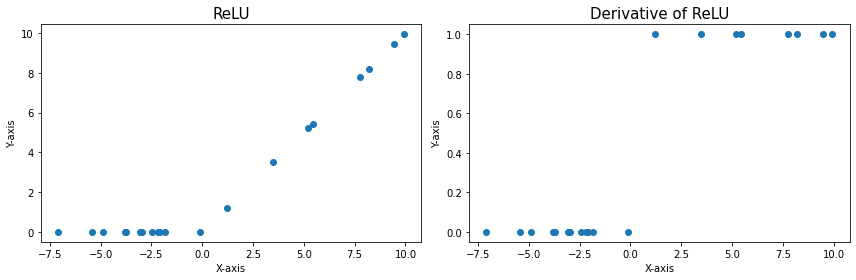

In [21]:
ReLU_values = list(map(ReLU,Arr))
print("Evaluation over function ReLU of the array is : \n")
print((ReLU_values),"\n")

ReLU_d_values = list(map(der_ReLU,Arr))
print("Evaluation over derivative of function ReLU of the array is : \n")
print((ReLU_d_values))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(Arr, ReLU_values)
plt.xlabel('X-axis', size=10)
plt.ylabel('Y-axis', size=10)
plt.title('ReLU',size = 15)

plt.subplot(1,2,2)
plt.scatter(Arr, ReLU_d_values)
plt.xlabel('X-axis', size=10)
plt.ylabel('Y-axis', size=10)
plt.title('Derivative of ReLU',size = 15)

plt.tight_layout()

### For leaky ReLU and its derivative

Evaluation over function leaky ReLU of the array is : 

[-0.0010796708923957077, -0.05438337911013276, -0.04890521524855773, -0.020734018055444618, -0.024536980461775198, 9.931484603092986, -0.01836055993336059, 5.437879896794271, 5.2107337601776855, -0.03799813026293359, -0.03069175908746054, -0.029647036500687517, -0.07090662870076901, 9.453293694349007, 8.183568759849802, 1.1991420744425003, -0.037281850700659085, 7.764000750477763, 3.491461316445278, -0.02178251047228768] 

Evaluation over derivative of function leaky ReLU of the array is : 

[0.01, 0.01, 0.01, 0.01, 0.01, 1, 0.01, 1, 1, 0.01, 0.01, 0.01, 0.01, 1, 1, 1, 0.01, 1, 1, 0.01]


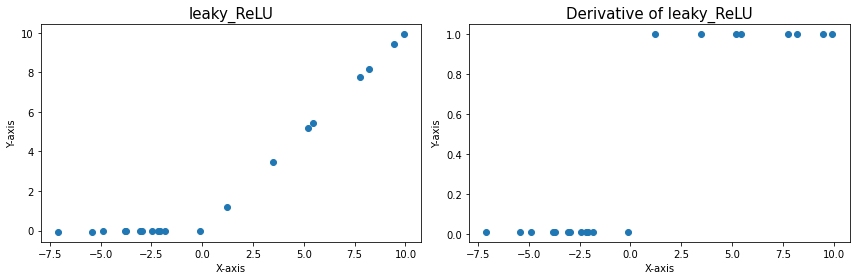

In [22]:
leaky_ReLU_values = list(map(leaky_ReLU,Arr))
print("Evaluation over function leaky ReLU of the array is : \n")
print((leaky_ReLU_values),"\n")

leaky_ReLU_d_values = list(map(der_leaky_ReLU,Arr))
print("Evaluation over derivative of function leaky ReLU of the array is : \n")
print((leaky_ReLU_d_values))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(Arr, leaky_ReLU_values)
plt.xlabel('X-axis', size=10)
plt.ylabel('Y-axis', size=10)
plt.title('leaky_ReLU',size = 15)

plt.subplot(1,2,2)
plt.scatter(Arr, leaky_ReLU_d_values)
plt.xlabel('X-axis', size=10)
plt.ylabel('Y-axis', size=10)
plt.title('Derivative of leaky_ReLU',size = 15)

plt.tight_layout()

## 7.6 Choice of Acivation Functions:
    It is crucial to choose the right hidden layer activation function for the model.
* ReLU is more or less is the standard activation function for the Multilayer Perceptron and Convolutional Neural Network(CNN).
* Tanh sigmoid functions are used for Recurrent Neural Network(RNN) and Long Short Term Memory(LSTM).

* For the output layer we choose the activation function based on the type of prediction problem we are solving.
* `Regression:` Linear Activation Function
* `Binary Classification:` Sigmoid Activation Function
* `Multi Class Classification:` Softmax Activation Function

Links: 
https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6
https://towardsdatascience.com/activation-functions-in-neural-networks-83ff7f46a6bd

# 8. Optimizers
### The work of optimizers is to reduce the error

## 8.1 BFGS (Broyden, Fletcher, Goldfarb, and Shanno, or BFGS Algorithm)
    local search optimization algorithm.
    L-BFGS -Local LBFGS

C:\Users\user\AppData\Local\Temp\ipykernel_35624\3631752174.py:21: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axis = figure.gca(projection='3d')


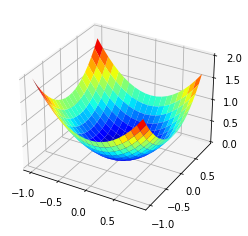

In [23]:
# 3d plot of the test function
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot
 
# objective function
def objective(x, y):
    return x**2.0 + y**2.0
 
# define range for input
r_min, r_max = -1.0, 1.0
# sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a surface plot with the jet color scheme
figure = pyplot.figure()
axis = figure.gca(projection='3d')
axis.plot_surface(x, y, results, cmap='jet')
# show the plot
pyplot.show()

    The BFGS algorithm belongs to a group of algorithms that are an extension to Newton’s Method optimization algorithm, referred to as Quasi-Newton Methods.

    Newton’s method is a second-order optimization algorithm that makes use of the Hessian matrix.

    A limitation of Newton’s method is that it requires the calculation of the inverse of the Hessian matrix. 
    This is a computationally expensive operation and may not be stable depending on the properties of the objective function.

    Quasi-Newton methods are second-order optimization algorithms that approximate the inverse of the Hessian matrix using the gradient, meaning that the Hessian and its inverse do not need to be available or calculated precisely for each step of the algorithm.
     
**Refer Optimization lecture on Hessian for details**

In [24]:
# bfgs algorithm local optimization of a convex function
from scipy.optimize import minimize
from numpy.random import rand
 
# objective function
def objective(x):
    return x[0]**2.0 + x[1]**2.0
 
# derivative of the objective function
def derivative(x):
    return [x[0] * 2, x[1] * 2]
 
# define range for input
r_min, r_max = -5.0, 5.0
# define the starting point as a random sample from the domain
pt = r_min + rand(2) * (r_max - r_min)
# perform the bfgs algorithm search
result = minimize(objective, pt, method='BFGS', jac=derivative)
# summarize the result
print('Status : %s' % result['message'])
print('Total Evaluations: %d' % result['nfev'])
# evaluate solution
solution = result['x']
evaluation = objective(solution)
print('Solution: f(%s) = %.5f' % (solution, evaluation))

Status : Optimization terminated successfully.
Total Evaluations: 4
Solution: f([ 2.28868302e-18 -6.81014490e-19]) = 0.00000


## SGD - Covered in Optimization Lecture

# 8.2 ADAM

### Working of Adam 
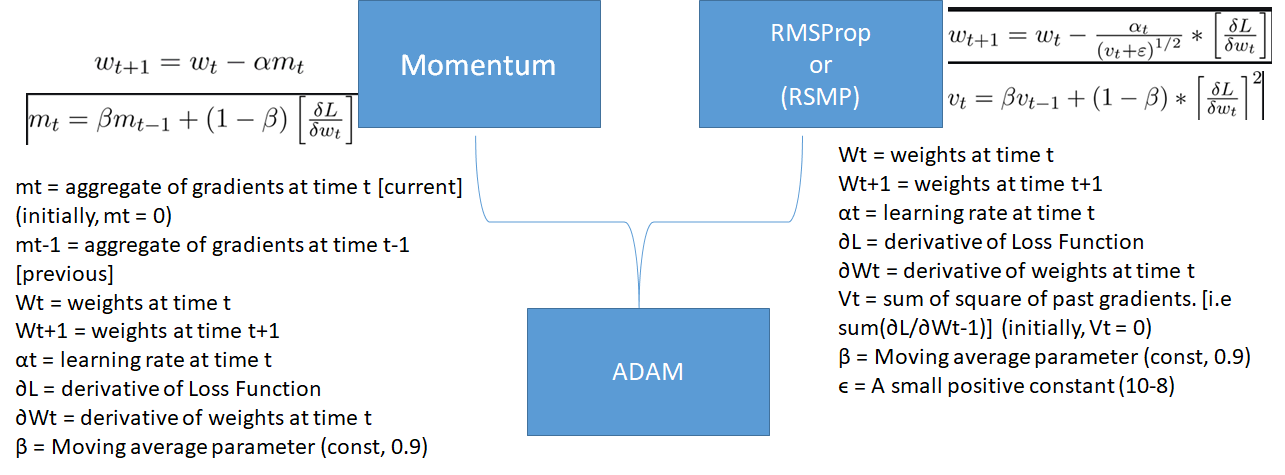


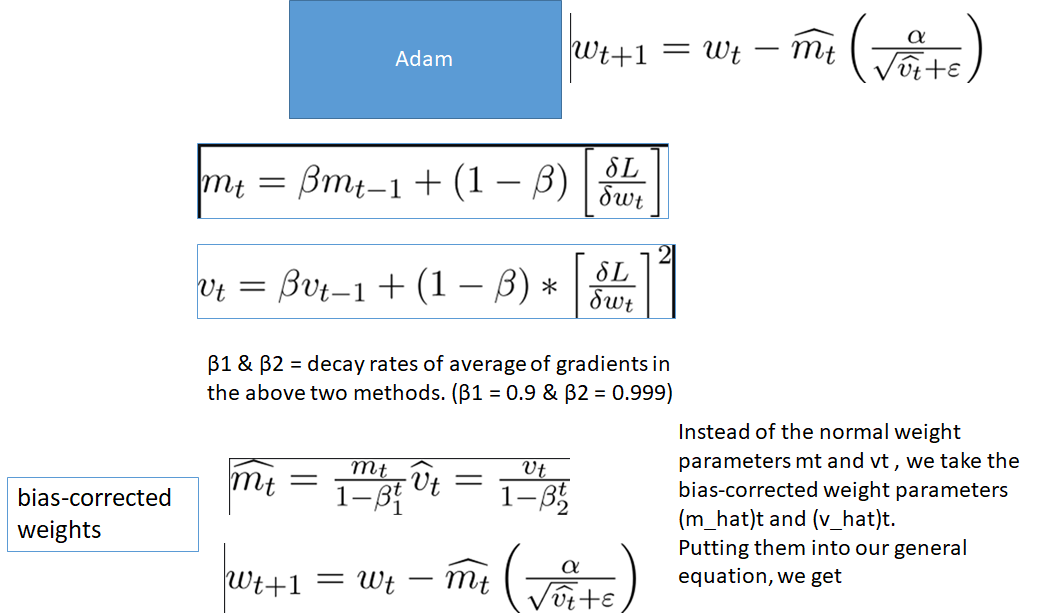

In [25]:
# gradient descent optimization with adam for a two-dimensional test function
from math import sqrt
from numpy import asarray
from numpy.random import rand
from numpy.random import seed
 
# objective function
def objective(x, y):
    return x**2.0 + y**2.0
 
# derivative of objective function
def derivative(x, y):
    return asarray([x * 2.0, y * 2.0])
 
# gradient descent algorithm with adam
def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
# generate an initial point
    x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    score = objective(x[0], x[1])
    # initialize first and second moments
    m = [0.0 for _ in range(bounds.shape[0])]
    v = [0.0 for _ in range(bounds.shape[0])]
    # run the gradient descent updates
    for t in range(n_iter):
        # calculate gradient g(t)
        g = derivative(x[0], x[1])
        # build a solution one variable at a time
        for i in range(x.shape[0]):
            # m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
            m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
            # v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
            v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
            # mhat(t) = m(t) / (1 - beta1(t))
            mhat = m[i] / (1.0 - beta1**(t+1))
            # vhat(t) = v(t) / (1 - beta2(t))
            vhat = v[i] / (1.0 - beta2**(t+1))
            # x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + eps)
            x[i] = x[i] - alpha * mhat / (sqrt(vhat) + eps)
        # evaluate candidate point
        score = objective(x[0], x[1])
        # report progress
        print('>%d f(%s) = %.5f' % (t, x, score))
    return [x, score]
 
# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 60
# steps size
alpha = 0.02
# factor for average gradient
beta1 = 0.8
# factor for average squared gradient
beta2 = 0.999
# perform the gradient descent search with adam
best, score = adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2)
print('Done!')
print('f(%s) = %f' % (best, score))

>0 f([-0.14595599  0.42064899]) = 0.19825
>1 f([-0.12613855  0.40070573]) = 0.17648
>2 f([-0.10665938  0.3808601 ]) = 0.15643
>3 f([-0.08770234  0.3611548 ]) = 0.13812
>4 f([-0.06947941  0.34163405]) = 0.12154
>5 f([-0.05222756  0.32234308]) = 0.10663
>6 f([-0.03620086  0.30332769]) = 0.09332
>7 f([-0.02165679  0.28463383]) = 0.08149
>8 f([-0.00883663  0.26630707]) = 0.07100
>9 f([0.00205801 0.24839209]) = 0.06170
>10 f([0.01088844 0.23093228]) = 0.05345
>11 f([0.01759677 0.2139692 ]) = 0.04609
>12 f([0.02221425 0.19754214]) = 0.03952
>13 f([0.02485859 0.18168769]) = 0.03363
>14 f([0.02572196 0.16643933]) = 0.02836
>15 f([0.02505339 0.15182705]) = 0.02368
>16 f([0.02313917 0.13787701]) = 0.01955
>17 f([0.02028406 0.12461125]) = 0.01594
>18 f([0.01679451 0.11204744]) = 0.01284
>19 f([0.01296436 0.10019867]) = 0.01021
>20 f([0.00906264 0.08907337]) = 0.00802
>21 f([0.00532366 0.07867522]) = 0.00622
>22 f([0.00193919 0.06900318]) = 0.00477
>23 f([-0.00094677  0.06005154]) = 0.00361
>24 f(

#### Types of Loss Functions

##### In supervised learning, there are two main types of loss functions — these correlate to the 2 major types of neural networks: regression and classification loss functions

    Regression Loss Functions — used in regression neural networks; given an input value, the model predicts a corresponding output value (rather than pre-selected labels); Ex. Mean Squared Error, Mean Absolute Error
    
    Classification Loss Functions — used in classification neural networks; given an input, the neural network produces a vector of probabilities of the input belonging to various pre-set categories — can then select the category with the highest probability of belonging; Ex. Binary Cross-Entropy, Categorical Cross-Entropy

https://machinelearningmastery.com/bfgs-optimization-in-python/
https://medium.com/@nishantnikhil/adam-optimizer-notes-ddac4fd7218

## Types of Neural Networks

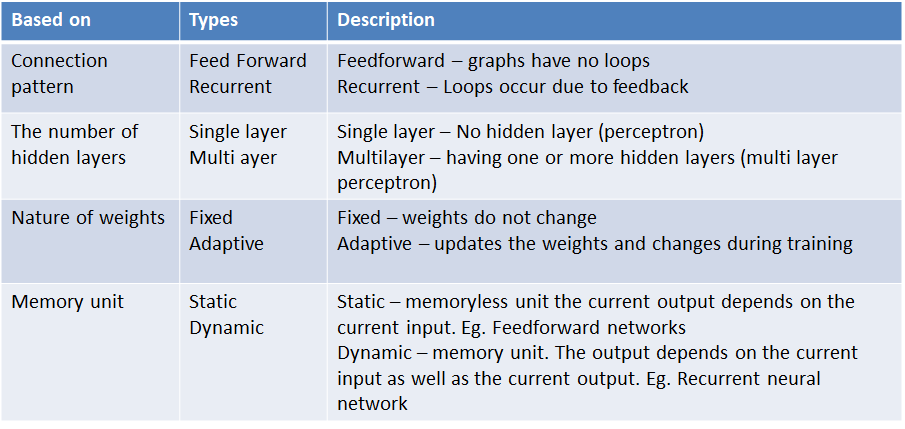

* Citations:
1. Shukla, et al., “Neural Networks from Scratch with Python Code and Math in Detail — I”, Towards AI, 2020
2. https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

### Softmax function

Predicting Probabilities With Neural Networks

Neural network models can be used to model classification predictive modeling problems.

Classification problems are those that involve predicting a class label for a given input. A standard approach to modeling classification problems is to use a model to predict the probability of class membership. That is, given an example, what is the probability of it belonging to each of the known class labels?

    For a binary classification problem, a Binomial probability distribution is used. This is achieved using a network with a single node in the output layer that predicts the probability of an example belonging to class 1.
    For a multi-class classification problem, a Multinomial probability is used. This is achieved using a network with one node for each class in the output layer and the sum of the predicted probabilities equals one.

A neural network model requires an activation function in the output layer of the model to make the prediction.

There are different activation functions to choose from; let’s look at a few.

### Linear Activation Function

One approach to predicting class membership probabilities is to use a linear activation.

A linear activation function is simply the sum of the weighted input to the node, required as input for any activation function. As such, it is often referred to as “no activation function” as no additional transformation is performed.

Recall that a probability or a likelihood is a numeric value between 0 and 1.

Given that no transformation is performed on the weighted sum of the input, it is possible for the linear activation function to output any numeric value. This makes the linear activation function inappropriate for predicting probabilities for either the binomial or multinomial case.

### Sigmoid Activation Function

Another approach to predicting class membership probabilities is to use a sigmoid activation function.

This function is also called the logistic function. Regardless of the input, the function always outputs a value between 0 and 1. The form of the function is an S-shape between 0 and 1 with the vertical or middle of the “S” at 0.5.

This allows very large values given as the weighted sum of the input to be output as 1.0 and very small or negative values to be mapped to 0.0.

The sigmoid activation is an ideal activation function for a binary classification problem where the output is interpreted as a Binomial probability distribution.

The sigmoid activation function can also be used as an activation function for multi-class classification problems where classes are non-mutually exclusive. These are often referred to as a multi-label classification rather than multi-class classification.

The sigmoid activation function is not appropriate for multi-class classification problems with mutually exclusive classes where a multinomial probability distribution is required.

Instead, an alternate activation is required called the softmax function.

### Max, Argmax, and Softmax
Max Function

The maximum, or “max,” mathematical function returns the largest numeric value for a list of numeric values.

We can implement this using the max() Python function; for example:

In [26]:
# example of the max of a list of numbers
# define data
data = [1, 3, 2]
# calculate the max of the list
result = max(data)
print(result)

3


### Argmax Function

The argmax, or “arg max,” mathematical function returns the index in the list that contains the largest value.

Think of it as the meta version of max: one level of indirection above max, pointing to the position in the list that has the max value rather than the value itself.

We can implement this using the argmax() NumPy function; for example:

In [27]:
# example of the argmax of a list of numbers
from numpy import argmax
# define data
data = [1, 3, 2]
# calculate the argmax of the list
result = argmax(data)
print(result)

1


### Softmax Function

The softmax, or “soft max,” mathematical function can be thought to be a probabilistic or “softer” version of the argmax function.

From a probabilistic perspective, if the argmax() function returns 1 in the previous section, it returns 0 for the other two array indexes, giving full weight to index 1 and no weight to index 0 and index 2 for the largest value in the list [1, 3, 2].
[0, 1, 0]

What if we were less sure and wanted to express the argmax probabilistically, with likelihoods?

This can be achieved by scaling the values in the list and converting them into probabilities such that all values in the returned list sum to 1.0.

This can be achieved by calculating the exponent of each value in the list and dividing it by the sum of the exponent values.

    probability = exp(value) / sum v in list exp(v)

For example, we can turn the first value “1” in the list [1, 3, 2] into a probability as follows:

    probability = exp(1) / (exp(1) + exp(3) + exp(2))
    probability = exp(1) / (exp(1) + exp(3) + exp(2))
    probability = 2.718281828459045 / 30.19287485057736
    probability = 0.09003057317038046

We can demonstrate this for each value in the list [1, 3, 2] in Python as follows:

In [28]:
# transform values into probabilities
from math import exp
# calculate each probability
p1 = exp(1) / (exp(1) + exp(3) + exp(2))
p2 = exp(3) / (exp(1) + exp(3) + exp(2))
p3 = exp(2) / (exp(1) + exp(3) + exp(2))
# report probabilities
print(p1, p2, p3)
# report sum of probabilities
print(p1 + p2 + p3)

0.09003057317038046 0.6652409557748219 0.24472847105479767
1.0


Running the example converts each value in the list into a probability and reports the values, then confirms that all probabilities sum to the value 1.0.

We can see that most weight is put on index 1 (67 percent) with less weight on index 2 (24 percent) and even less on index 0 (9 percent).

In [29]:
# example of a function for calculating softmax for a list of numbers
from numpy import exp
 
# calculate the softmax of a vector
def softmax(vector):
    e = exp(vector)
    return e / e.sum()
 
# define data
data = [1, 3, 2]
# convert list of numbers to a list of probabilities
result = softmax(data)
# report the probabilities
print(result)
# report the sum of the probabilities
print(sum(result))

[0.09003057 0.66524096 0.24472847]
1.0


Finally, we can use the built-in softmax() NumPy function to calculate the softmax for an array or list of numbers, as follows:

In [30]:
# example of calculating the softmax for a list of numbers
from scipy.special import softmax
# define data
data = [1, 3, 2]
# calculate softmax
result = softmax(data)
# report the probabilities
print(result)
# report the sum of the probabilities
print(sum(result))

[0.09003057 0.66524096 0.24472847]
0.9999999999999997


### Softmax Activation Function

The softmax function is used as the activation function in the output layer of neural network models that predict a multinomial probability distribution.

That is, softmax is used as the activation function for multi-class classification problems where class membership is required on more than two class labels.

    Any time we wish to represent a probability distribution over a discrete variable with n possible values, we may use the softmax function. This can be seen as a generalization of the sigmoid function which was used to represent a probability distribution over a binary variable.

— Page 184, Deep Learning, 2016.

The function can be used as an activation function for a hidden layer in a neural network, although this is less common. It may be used when the model internally needs to choose or weight multiple different inputs at a bottleneck or concatenation layer.

    Softmax units naturally represent a probability distribution over a discrete variable with k possible values, so they may be used as a kind of switch.

— Page 196, Deep Learning, 2016.

In the Keras deep learning library with a three-class classification task, use of softmax in the output layer may look as follows:
...
model.add(Dense(3, activation='softmax'))

By definition, the softmax activation will output one value for each node in the output layer. The output values will represent (or can be interpreted as) probabilities and the values sum to 1.0.

When modeling a multi-class classification problem, the data must be prepared. The target variable containing the class labels is first label encoded, meaning that an integer is applied to each class label from 0 to N-1, where N is the number of class labels.

The label encoded (or integer encoded) target variables are then one-hot encoded. This is a probabilistic representation of the class label, much like the softmax output. A vector is created with a position for each class label and the position. All values are marked 0 (impossible) and a 1 (certain) is used to mark the position for the class label.

For example, three class labels will be integer encoded as 0, 1, and 2. Then encoded to vectors as follows:

    Class 0: [1, 0, 0]
    Class 1: [0, 1, 0]
    Class 2: [0, 0, 1]

This is called a one-hot encoding.

It represents the expected multinomial probability distribution for each class used to correct the model under supervised learning.

The softmax function will output a probability of class membership for each class label and attempt to best approximate the expected target for a given input.

For example, if the integer encoded class 1 was expected for one example, the target vector would be:

    [0, 1, 0]

The softmax output might look as follows, which puts the most weight on class 1 and less weight on the other classes.

    [0.09003057 0.66524096 0.24472847]

The error between the expected and predicted multinomial probability distribution is often calculated using cross-entropy, and this error is then used to update the model. This is called the cross-entropy loss function.

For more on cross-entropy for calculating the difference between probability distributions, see the tutorial:

    A Gentle Introduction to Cross-Entropy for Machine Learning

We may want to convert the probabilities back into an integer encoded class label.

This can be achieved using the argmax() function that returns the index of the list with the largest value. Given that the class labels are integer encoded from 0 to N-1, the argmax of the probabilities will always be the integer encoded class label.

    class integer = argmax([0.09003057 0.66524096 0.24472847])
    class integer = 1

https://machinelearningmastery.com/softmax-activation-function-with-python/